In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from yellowbrick.target import FeatureCorrelation
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import f1_score, accuracy_score, classification_report
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
df = pd.read_csv('clean_data.csv')

In [4]:
df.genre.value_counts()

Indie              9305
Pop                9052
Hip-Hop            9003
Rap                8966
Electronic         8897
                   ... 
wisconsin indie       1
country dawn          1
indian edm            1
twee pop              1
chinese hip hop       1
Name: genre, Length: 1369, dtype: int64

In [5]:
genre = (df["genre"].str.strip()).str.lower()

def genre_splitter(genre):
    result = genre.copy()
    result = result.str.split(" ",1)
    for i in range(len(result)):
        if (len(result[i]) > 1):
            result[i] = [result[i][1]]
    return result.str.join('')

genre_m1 = genre.copy()
while(max((genre_m1.str.split(" ", 1)).str.len()) > 1):
    genre_m1 = genre_splitter(genre_m1)

len(genre_m1.unique())

456

In [6]:
unique = genre_m1.unique()
to_remove = [] 

# genres that have number of songs < 500 will be removed
for genre in unique:
    if genre_m1.value_counts()[genre] < 500:
        to_remove += [genre]
len(to_remove)

426

In [7]:
df['genre'] = genre_m1
df

,name,artist,id,popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,year
0,6 8,Gabriel Garzón-Montano,0uGEDEO3GjRcnZLFvUxKuA,0,r&b,0.787,0.0577,0,-13.125,1,0.0755,0.88300,0.001330,0.0714,0.157,115.314,4.98,2014
1,To Love Somebody,Bee Gees,3rGFsUgyH9GbbYJT4iwbhJ,0,disco,0.423,0.3840,9,-12.503,1,0.0315,0.72900,0.000004,0.2700,0.521,90.430,3.03,1967
2,"Stayin' Alive - From ""Saturday Night Fever"" So...",Bee Gees,6pyzBTIjcO2AMkKE6x2Otb,0,disco,0.703,0.8260,10,-7.179,0,0.0341,0.03220,0.006290,0.1790,0.945,103.564,4.76,1979
3,"Jive Talkin' - From ""Saturday Night Fever"" Sou...",Bee Gees,4t0Pj3iBnSCZv5pDEPNmzG,64,disco,0.811,0.5450,7,-12.969,0,0.0579,0.15500,0.085300,0.1560,0.734,105.911,3.70,1975
4,"Emotion - New ""Edit"" Version",Bee Gees,2eFM2ufqYVEs0oUA7O5U0O,0,disco,0.689,0.6400,4,-6.991,0,0.0459,0.10700,0.000019,0.1920,0.637,91.834,3.64,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250570,Wait Up,Charlotte Lawrence,6VM9H9tmexHFNLePOXOVPX,51,indie,0.631,0.7050,0,-2.941,0,0.0344,0.22300,0.000032,0.1280,0.382,101.075,3.08,2018
250571,Don't Phunk With My Heart,The Black Eyed Peas,4MtDnnAJ1AtWit10FRmZdW,54,dance,0.691,0.9290,8,-2.730,0,0.0645,0.00877,0.000000,0.4720,0.574,130.899,4.00,2005
250572,Don't Phunk With My Heart,The Black Eyed Peas,4MtDnnAJ1AtWit10FRmZdW,54,rap,0.691,0.9290,8,-2.730,0,0.0645,0.00877,0.000000,0.4720,0.574,130.899,4.00,2005
250573,Don't Phunk With My Heart,The Black Eyed Peas,4MtDnnAJ1AtWit10FRmZdW,54,pop,0.691,0.9290,8,-2.730,0,0.0645,0.00877,0.000000,0.4720,0.574,130.899,4.00,2005


In [8]:
df.set_index(["genre"],drop = False, inplace = True)
for name in to_remove:
    type(name)
    df.drop(index = str(name), inplace = True)

In [9]:
df['genre'].value_counts()

pop            15923
music          13937
rock           11770
rap            10690
indie          10501
r&b             9742
country         9631
dance           9070
electronic      9033
hip-hop         9003
soundtrack      8924
comedy          8884
alternative     8758
folk            8723
soul            8593
reggaeton       8501
world           8455
classical       8228
reggae          7949
anime           7854
jazz            7685
ska             7594
blues           7219
opera           7135
movie           6953
hop             3265
metal           1248
edm              629
ccm              595
standards        537
Name: genre, dtype: int64

In [22]:
anova_df = df.copy()
anova_df = anova_df[['popularity','year']].reset_index()

genres = (anova_df["genre"].str.strip()).str.lower()

to_add = []
# genres that have number of songs < 9000 will be removed
for genre in genres.unique():
    if anova_df.genre.value_counts()[genre] >= 9000:
        to_add += [genre]

anova_df = anova_df[anova_df.genre.isin(to_add)]
anova_df = anova_df[anova_df.year >= 1988]

anova_df.reset_index(drop=True, inplace=True)

dfs = []
for genre in to_add:
    dfs.append(anova_df[anova_df.genre == genre])


aggregated_dfs = []
for datafr in dfs:
    aggregated_df = datafr.groupby(['year', 'genre']).mean()
    normaltest = stats.normaltest(aggregated_df['popularity']).pvalue
    if normaltest < 0.05:
        aggregated_dfs.append(aggregated_df)

print(aggregated_dfs)

[            popularity
year genre            
1988 rap     56.294118
1989 rap     47.166667
1990 rap     56.230769
1991 rap     56.666667
1992 rap     47.772727
1993 rap     60.868421
1994 rap     57.590164
1995 rap     57.127660
1996 rap     55.405797
1997 rap     60.694444
1998 rap     58.821429
1999 rap     60.820225
2000 rap     56.178571
2001 rap     60.360465
2002 rap     53.159292
2003 rap     47.151786
2004 rap     44.194118
2005 rap     45.557214
2006 rap     53.425197
2007 rap     48.792453
2008 rap     49.892405
2009 rap     49.817073
2010 rap     46.504886
2011 rap     47.188272
2012 rap     44.878553
2013 rap     45.405190
2014 rap     47.848214
2015 rap     51.788835
2016 rap     51.981051
2017 rap     56.428271
2018 rap     62.426623
2019 rap     61.177778,                  popularity
year genre                 
1988 electronic   35.666667
1989 electronic   45.520000
1990 electronic   45.863636
1991 electronic   43.451613
1992 electronic   40.500000
1993 electronic   40

Anova p-value:  [1.90564142e-36]


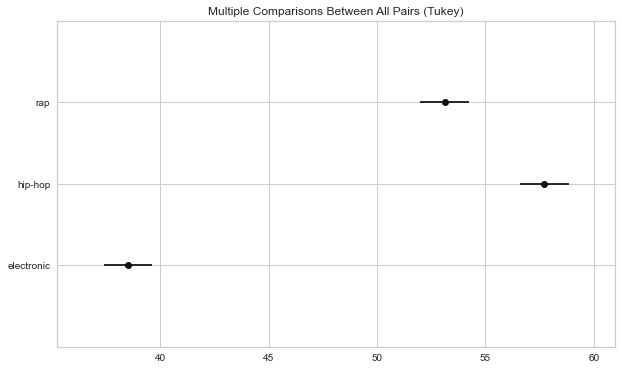

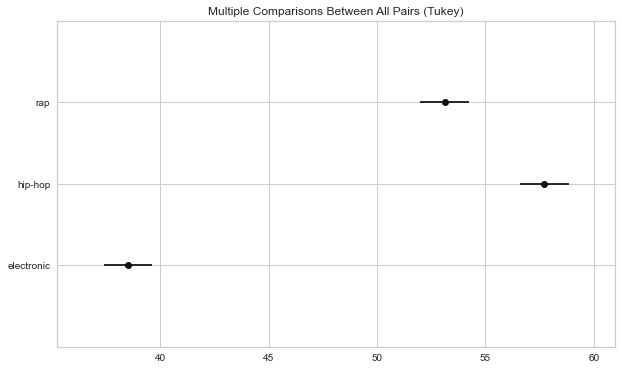

In [26]:
anova = stats.f_oneway(aggregated_dfs[0], aggregated_dfs[1], aggregated_dfs[2])
print("Anova p-value: ", anova.pvalue)

data = pd.DataFrame({'rap': aggregated_dfs[0].popularity.values.tolist(),
                        'electronic': aggregated_dfs[1].popularity.values.tolist(),
                        'hip-hop': aggregated_dfs[2].popularity.values.tolist()})
melt = pd.melt(data)

posthoc = pairwise_tukeyhsd(
    melt['value'], melt['variable'],
    alpha=0.05)

posthoc.plot_simultaneous()

In [12]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_min','key','mode','year','popularity']

ros = RandomOverSampler()

X = df[feature_names]
y = df['genre']

X_ros, y_ros = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state=42, test_size=0.2)

knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))
rf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=10, max_depth=8, min_samples_leaf=8))
nb = make_pipeline(StandardScaler(), GaussianNB())

models = [['KNN', knn], ['Random Forest', rf], ['Naive Bayes', nb]]


for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('name: {}, EM: {}, F1: {}'.format(name, accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted')))
    


name: KNN, EM: 0.6950951453871758, F1: 0.6914952434832417
name: Random Forest, EM: 0.3764575352215872, F1: 0.3428011795516661
name: Naive Bayes, EM: 0.2914651761602713, F1: 0.2608568795752777


In [13]:
binarizer = LabelBinarizer()
y_ros = binarizer.fit_transform(y_ros)
y_ros

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [14]:
import tensorflow as tf

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state=42, test_size=0.2)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(40, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(30))

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=75, verbose=0)
y_pred = model.predict(X_test)


In [15]:
print(model.evaluate(X_test, y_test))
# print(f1_score(y_test, y_pred, average='macro'))

2986/2986 [==============================] - 2s 541us/step - loss: 0.1072 - accuracy: 0.2964
[0.10718223452568054, 0.2964160740375519]
